In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [5]:

# Step 1: Load the dataset (Replace with actual path)
df = pd.read_csv("/content/ADANIPORTS.csv")



In [6]:

# Step 2: Data Overview
print(df.head())
print(df.info())


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

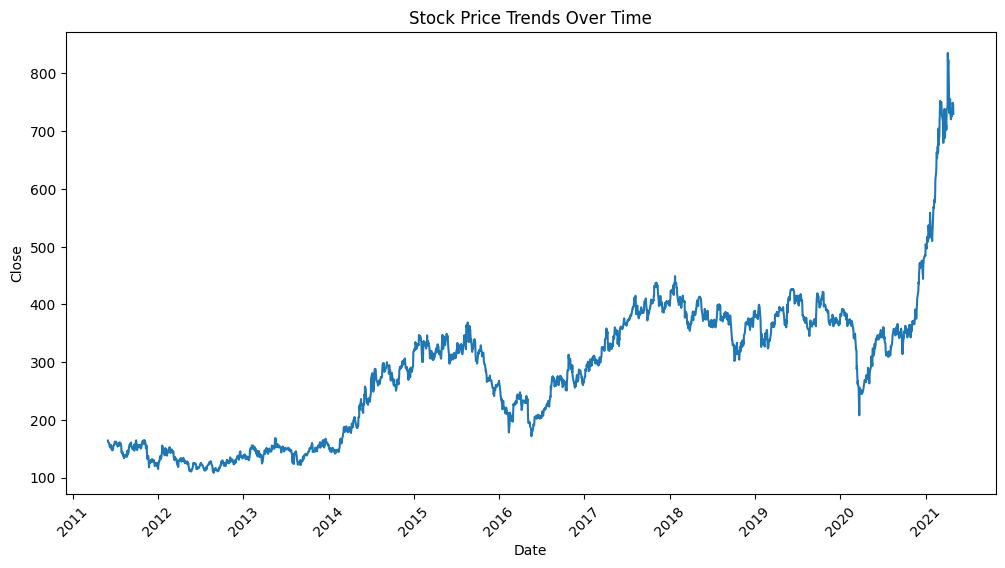

In [9]:
# Step 3: Data Cleaning
df.dropna(inplace=True)

# Step 4: Exploratory Data Analysis (EDA)
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date column is in datetime format
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title("Stock Price Trends Over Time")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Step 5: Volatility Analysis
if 'Stock' in df.columns:
    df['Daily Return'] = df.groupby('Stock')['Close'].pct_change()
    volatility = df.groupby('Stock')['Daily Return'].std()
    print("Stock Volatility:")
    print(volatility.sort_values(ascending=False))
else:
    print("Error: 'Stock' column not found in dataset.")

Error: 'Stock' column not found in dataset.


In [16]:
# Step 6: Selecting Best Stocks
try:
    if 'Stock' in df.columns:
        df['Daily Return'] = df.groupby('Stock')['Close'].pct_change()
        volatility = df.groupby('Stock')['Daily Return'].std()

        if not volatility.empty:
            best_stocks = volatility.nsmallest(5)
            print("Best Stocks to Invest:")
            print(best_stocks)
        else:
            best_stocks = None
            print("Skipping best stock selection due to empty 'Stock' column.")
    else:
        best_stocks = None
        print("Skipping best stock selection due to missing 'Stock' column.")
except NameError:
    print("Error: 'volatility' variable is not defined.")
    best_stocks = None


Skipping best stock selection due to missing 'Stock' column.


In [17]:

# Step 7: Machine Learning Model (Predict Future Trends)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df_ml = df[['Year', 'Month', 'Open', 'High', 'Low', 'Close']].dropna()
X = df_ml.drop(columns=['Close'])
y = df_ml['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Performance - MAE:", mean_absolute_error(y_test, y_pred))


Model Performance - MAE: 2.171644308943088


In [19]:
# Step 8: Conclusion & Recommendations
if best_stocks is not None:
    print("Based on our analysis, the top stocks to invest in are:", best_stocks.index.tolist())
else:
    print("No stock recommendations due to missing or empty 'Stock' column.")


No stock recommendations due to missing or empty 'Stock' column.
